# <center>Spanning Cluster</center>

Second part of the project is to count and label every different cluster that was created on the 2D grid. We treat adjacent sites as a cluster if black squares around it created a closed loop. The goal is to see, that for a mentioned before critical probability $p_c$ there is a high chance that we can find a large cluster that spans most of the grid.

To find all cluster we are going to use <i>Hoshen-Kopelman</i> algorithm. It's a method used primarly in computational studies to identify and label clusters often used in percolation theory. In short, here are some key steps of the algorithm:

<ul>
    <li>First we set the nearest top left available square on the grid. We iterate through each site to the right and then we do it again with another row till the end of the lattice</li>
    <li>If top and left neighbours are unoccupied (have value $0$) we have found a new cluster</li>
    <li>If top or left square is occupied we can assign current square to an existing cluster</li>
    <li>If top and left squares belong to two different clusters, we have found a site that joins them together. We have to assign one of them to another, but important part is to change only the label, not every site because it will increase the simulation time substantially (one graph will show how much of a difference can it make)</li>
</ul>

After we have labelled all clusters, we can easilly count them, find the biggest one and plot histograms - which is exactly what we will do in the following part of the project.

In [1]:
from SpanningCluster.SpanningCluster import SpanningCluster
from matplotlib import pyplot as plt
import ipywidgets
%matplotlib inline

First of all, we can set labeling all squares with reverse updates or without them. The advantege of reverse updates is that it allows to make much better looking visualizations, but it slows down the simulation. Below we define both approaches.

In [2]:
L = 20
p = 0.54
spanning_cluster = SpanningCluster(L=L, p=p)
initial_grid = spanning_cluster.get_initial_grid()
spanning_cluster.hk_algorithm(reset_grid=True, update_clusters=False, initial_grid=initial_grid)
cluster_1 = spanning_cluster.get_current_grid()
spanning_cluster.hk_algorithm(reset_grid=True, update_clusters=True, initial_grid=initial_grid)
cluster_2 = spanning_cluster.get_current_grid()

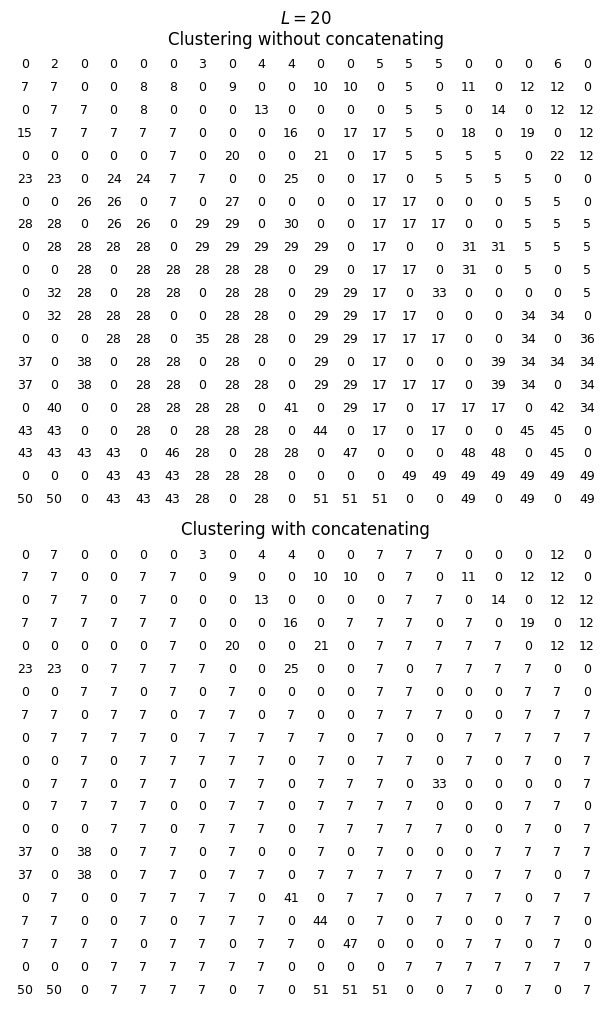

In [3]:
figure1, axes1 = plt.subplots(2, 1, layout='constrained')
spanning_cluster.plot_grid_as_matrix(matrix=cluster_1, axes=axes1[0])
axes1[0].set_title(f'$L = {L}$\nClustering without concatenating')
spanning_cluster.plot_grid_as_matrix(matrix=cluster_2, axes=axes1[1])
axes1[1].set_title('Clustering with concatenating')
figure1.set_size_inches(6, 10)

The main difference we can notice is that on the first graph we can see two distinct numbers next to each other, while on the second one that's not the case, because every adjacent cluster was relabelled.

Now let's see how we store calculated values after HK algorithm and compare it to the grid.

Mk2: 6
Mk3: 1
Mk4: 2
Mk5: 1
Mk6: 2
Mk7: -k10
Mk8: -k10
Mk9: -k11
Mk10: 33
Mk11: -k10
Mk12: -k10
Mk13: 2
Mk14: 3
Mk15: 2


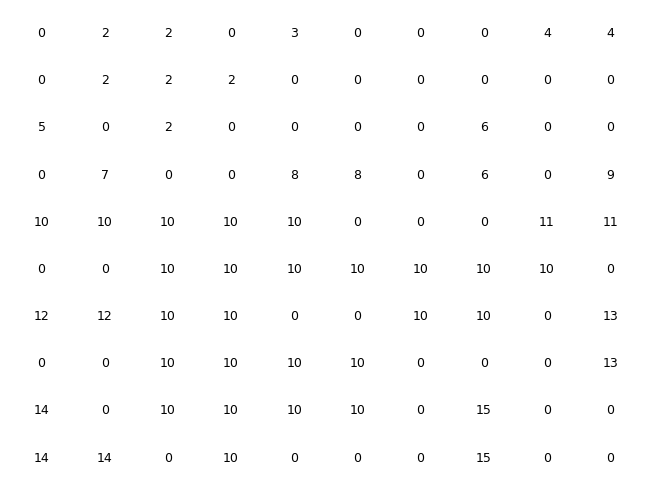

In [4]:
L = 10
spanning_cluster = SpanningCluster(L=L, p=p)
spanning_cluster.hk_algorithm(reset_grid=True, update_clusters=False)
for key, value in spanning_cluster.get_container().items():
    print(f'{key}: {value}')
figure2, axes2 = plt.subplots(1, 1, layout='constrained')
spanning_cluster.plot_grid_as_matrix(matrix=spanning_cluster.get_current_grid(), axes=axes2)

By checking values in the container we can deduce exactly which clusters where joined to another one. They are marked as $-k_i$. We can also convert acquired container into histogram.

In [5]:
spanning_cluster.convert_cluster_to_histogram()
print(spanning_cluster.get_histogram(sort=True))

{'1': 2, '2': 4, '3': 1, '6': 1, '33': 1}


And now let's see the histogram for a bigger grid:

In [6]:
spanning_cluster = SpanningCluster(L=40, p=0.56)
spanning_cluster.hk_algorithm(reset_grid=True, update_clusters=False)
spanning_cluster.convert_cluster_to_histogram()
for key, value in spanning_cluster.get_histogram(sort=True).items():
    print(f'{key}: {value}')

1: 44
2: 9
3: 6
4: 6
5: 4
6: 3
8: 1
9: 2
10: 1
11: 3
12: 3
15: 1
16: 3
17: 3
21: 2
23: 1
28: 1
30: 1
34: 1
35: 1
62: 1
64: 1
95: 1
118: 1


Now we can visualize what exactly happens after HK algorithm to 2D grid. Let's see first the difference between concatenated and not concatenated graphs.

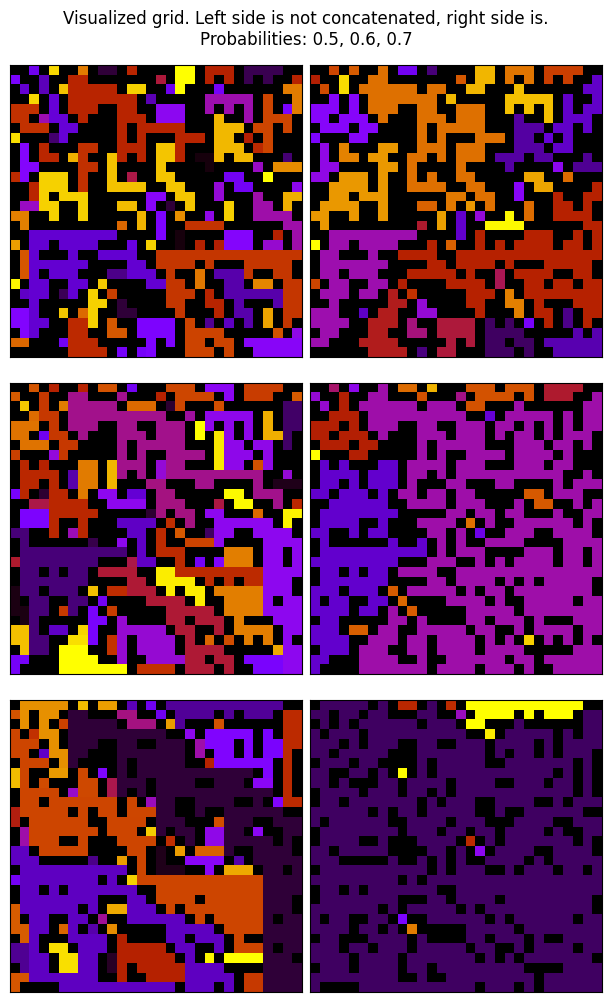

In [10]:
spanning_cluster = SpanningCluster(L=30)
initial_grid = spanning_cluster.get_initial_grid()
probabilities = [0.5, 0.6, 0.7]

figure3, axes3 = plt.subplots(len(probabilities), 2, layout='constrained')
for x, probability in enumerate(probabilities):
    for y, bool_value in enumerate([False, True]):
        spanning_cluster.change_probability(probability)
        spanning_cluster.hk_algorithm(reset_grid=True, update_clusters=bool_value, initial_grid=initial_grid)
        spanning_cluster.visualize_clusters(ax=axes3[x][y], add_title=False)
figure3.suptitle(f'Visualized grid. Left side is not concatenated, right side is.\n'
                 f'Probabilities: {", ".join(list(map(str, probabilities)))}')
figure3.set_size_inches(6, 10)

We can see that we have different colors next to each other in graphs on the left. This happens because they are labelled with different number and information about them being concatenated is hidden in the container. On the right side we have better visualizations with each cluster separated by a black color, but it takes additional computational time. 

Below we can see how much of a difference concatenating clusters can make.

![Time](./SpanningCluster/images/TimeComparisonGraphT10000L100.png)

Now let's create an interactive graph to see exactly what happens for each probability.

In [11]:
cluster_grid = {
    50: SpanningCluster(L=50),
    100: SpanningCluster(L=100),
    150: SpanningCluster(L=150),
    200: SpanningCluster(L=200)
}

In [27]:
def visualize_clustered_grid(model_dict, L=50, p=0.5, concatenated=True):
    model = model_dict[L]
    model.change_probability(p)
    model.hk_algorithm(reset_grid=True,
                       update_clusters=concatenated)
    model.convert_cluster_to_histogram()
    figure, axes = plt.subplots(1, 1, layout='constrained')
    model.visualize_clusters(ax=axes, add_title=True)
    figure.set_size_inches(5.5, 5.5)

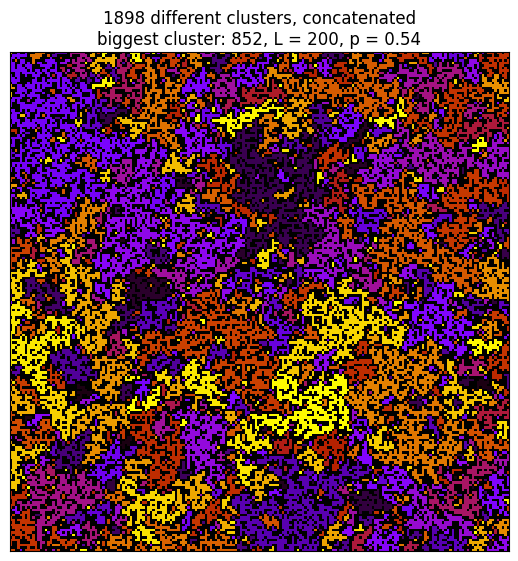

In [28]:
visualize_clustered_grid(cluster_grid, L=200, p=0.54, concatenated=True)

In [32]:
ipywidgets.interact(visualize_clustered_grid,
                    model_dict=ipywidgets.fixed(cluster_grid),
                    L=[50, 100, 150, 200],
                    p=(0.4, 0.7, 0.02),
                    concatenated=[False, True])

interactive(children=(Dropdown(description='L', options=(50, 100, 150, 200), value=50), FloatSlider(value=0.5,…

<function __main__.visualize_clustered_grid(model_dict, L=50, p=0.5, concatenated=True)>

Now based on many repetitions we can estimate the size of the biggest cluster for each probability, the same way as we calculated percolation probability in previous part of the project.

In [31]:
from IPython.display import display, Latex

In [35]:
def calculate_average_biggest_cluster(L=20, p=0.5):
    cluster = SpanningCluster(L=L, p=p)
    cluster.t_spanning_cluster_trials(trials=100, update_clusters=False)
    average_cluster = cluster.get_average_biggest_cluster()
    display(Latex(f'Average cluster for $L = {L}$ and probability ${p}$ is ${average_cluster}$'))

In [36]:
calculate_average_biggest_cluster()

<IPython.core.display.Latex object>

In [38]:
ipywidgets.interact(calculate_average_biggest_cluster, L=(20, 100, 10), p=(0.4, 0.7, 0.02))

interactive(children=(IntSlider(value=20, description='L', min=20, step=10), FloatSlider(value=0.5, descriptio…

<function __main__.calculate_average_biggest_cluster(L=20, p=0.5)>

Below we can see graphs for larger parameters:

![AverageCluster](./SpanningCluster/images/AverageClusterGraphT10000L-10-50-100.png)

And last but not least we can create a histogram over many repetitions for given probability.

In [41]:
import numpy as np

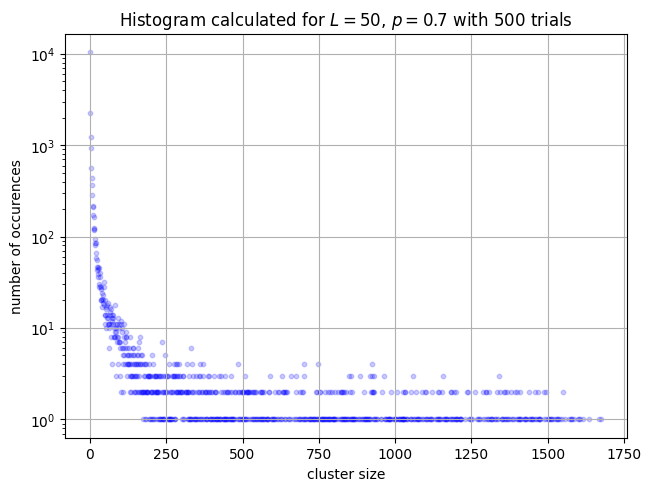

In [44]:
L = 50
p = 0.7
trials = 500
spanning_cluster = SpanningCluster(L=L, p=p)
spanning_cluster.t_histogram_trials(trials=trials, 
                                    reset_histogram=False, 
                                    normalize_histogram=False)
histogram = spanning_cluster.get_histogram()
cluster_size_space = np.array(list(map(int, histogram.keys())))
cluster_number_space = np.array(list(histogram.values()))

figure4, axes4 = plt.subplots(1, 1, layout='constrained')
axes4.scatter(cluster_size_space, cluster_number_space, color='blue', alpha=0.2, s=10)
axes4.set_title(f'Histogram calculated for $L = {L}$, $p = {p}$ with ${trials}$ trials')
axes4.set(xlabel='cluster size', ylabel='number of occurences', yscale='log')
axes4.grid()

And below we can see a graph calculated for larger $L$ and many trials.

![Distribution](./SpanningCluster/images/ClusterSizeDistributionGraphT10000L100.png)

And some other generated graphics:

![HKvisualization](./SpanningCluster/images/HKVisualizationL500p-0.4-0.54-0.56-0.58-0.6-0.8_concat_two_col.png)

![dist](./SpanningCluster/images/ClusterSizeDistributionGraphT10000L10.png)